Notebook to examine strange trajectories in the CIOPS-W run.

Drifters to examine:
1. wp5752521552D20161104
2. wp3772515323D20160526
3. wp4362522943D20160617

In [1]:
import xarray as xr
import os
import matplotlib.pyplot as plt
import glob
from geopy.distance import geodesic
from mpl_toolkits.basemap import Basemap
from matplotlib.pyplot import cm
import numpy as np
%matplotlib inline

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
data_dir='/home/soontiensn/data/gpsc-work2/OPP/ciopsw/ciopsw_hourly_windage2/all_output/output_per_drifter/'
obs_dir='/home/soontiensn/data/gpsc-work2/OPP/drifter_data/wp'

# wp5752521552D20161104

In [3]:
f = glob.glob(os.path.join(data_dir, '*wp5752521552D20161104*'))[0]
d = xr.open_dataset(f)

Loop through all model runs and plot obs_lon, obs_lat. Trying to identify weird trajectories

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


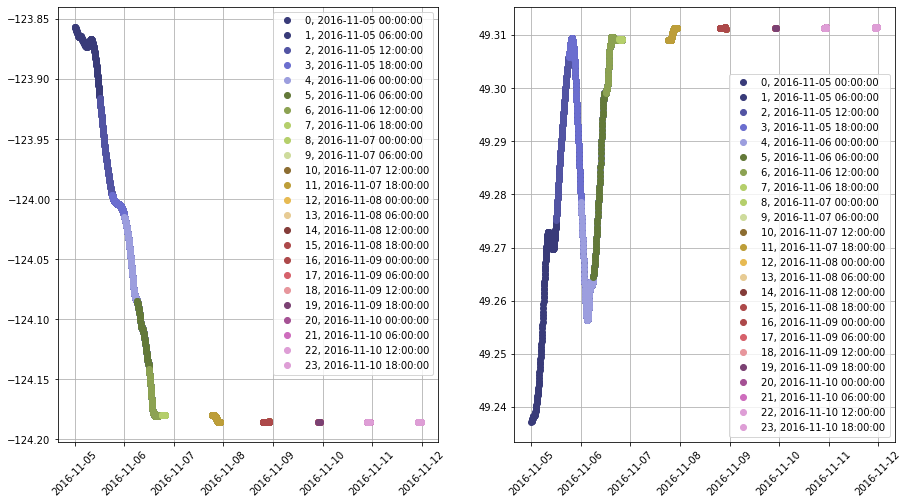

In [4]:
fig, axs = plt.subplots(1,2,figsize=(15,8))
n = d.obs_lon.values.shape[0]
color=cm.tab20b(np.linspace(0,1,n))
for i in range(n):
    ax=axs[0]
    ax.plot(d.time[i,:], d.obs_lon.values[i,:],'o',c=color[i],label='{}, {}'.format(i, d.mod_start_date[i].values))
    ax=axs[1]
    ax.plot(d.time[i,:], d.obs_lat.values[i,:],'o',c=color[i],label='{}, {}'.format(i, d.mod_start_date[i].values))
for ax in axs:
    ax.legend(loc=0)
    ax.grid()
    ax.tick_params(axis='x', labelrotation=45)

* Starting after mod_run = 7 ( 2016-11-06 18:00:00), the drifter's reporting frequency changes. It appears to report for a few hours every day but only near the end of the day. During this time, the drifter's position is changing but only by a small amount. Do the speed checks catch unusually small velocities? What is the velocity of the drifter?
* Our strategy to split the file if reporting is longer than 24 hours does not exlcude this unusual trajectory.
* But why is it unusual? Look at the map.

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


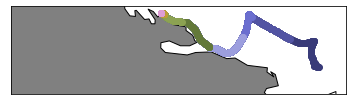

In [5]:
fig, ax = plt.subplots(1,1)
m = Basemap(projection='merc', llcrnrlon=-124.5, urcrnrlon=-123.8, llcrnrlat=49.2, urcrnrlat=49.32,
            resolution='h', ax=ax)
x,y=m(d.obs_lon.values,d.obs_lat.values)
for i in range(d.obs_lon.values.shape[0]):
    m.plot(x[i,:],y[i,:], 'o',c=color[i])
m.drawcoastlines()
m.fillcontinents(color='gray')

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


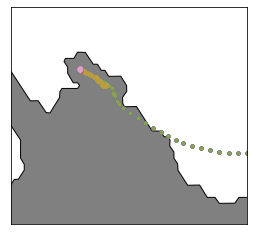

In [6]:
fig, ax = plt.subplots(1,1)
m = Basemap(projection='merc', llcrnrlon=-124.2, urcrnrlon=-124.15, llcrnrlat=49.29, urcrnrlat=49.32,
            resolution='f', ax=ax)
x,y=m(d.obs_lon.values,d.obs_lat.values)
for i in range(d.obs_lon.values.shape[0]):
    m.plot(x[i,:],y[i,:], '.',c=color[i])
m.drawcoastlines()
m.fillcontinents(color='gray')

This drifter was likely grounded - we could catch that by looking for very small velocities (what values?). The basemap land mask here has the drifter moving overtop of land ie this landmask is not accurate enough for determning if a drifter is on land or not. 

Now look at model release points and trajectories

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


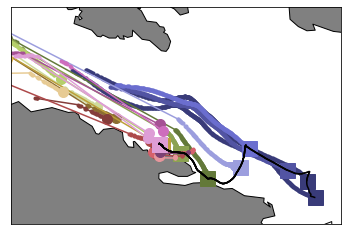

In [7]:
fig, ax = plt.subplots(1,1)
m = Basemap(projection='merc', llcrnrlon=-124.5, urcrnrlon=-123.8, llcrnrlat=49.2, urcrnrlat=49.5,
            resolution='h', ax=ax)
x,y=m(d.obs_lon.values,d.obs_lat.values)
xm,ym =m(d.mod_lon.values, d.mod_lat.values)
xs,ys=m(d.mod_start_lon.values, d.mod_start_lat.values)
for i in range(n):
    m.plot(xm[i,:], ym[i,:], '.-', c=color[i])
    m.plot(xm[i,0], ym[i,0], 'o', c=color[i],ms=10)
    m.plot(xs[i], ys[i], 's',c=color[i],ms=15)
    m.plot(x[i,:],y[i,:], '-', c='k',zorder=10)
m.drawcoastlines()
m.fillcontinents(color='gray')

* squares = model release points
* circles = first model position in array


* Confirmed: models are released at the observed locations
* Several models are deployed where the drifters appears to have grounded (about 15)
* Circles that are closes to release points are the models that had release times near the observed recordings.
* Straight lines in model tracks are because of interpoation anc connecting the dots.

Zoom in

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


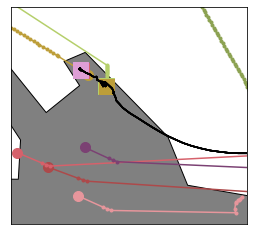

In [8]:
fig, ax = plt.subplots(1,1)
m = Basemap(projection='merc', llcrnrlon=-124.2, urcrnrlon=-124.15, llcrnrlat=49.29, urcrnrlat=49.32,
            resolution='h', ax=ax)
x,y=m(d.obs_lon.values,d.obs_lat.values)
xm,ym =m(d.mod_lon.values, d.mod_lat.values)
xs,ys=m(d.mod_start_lon.values, d.mod_start_lat.values)
for i in range(n):
    m.plot(xm[i,:], ym[i,:], '.-', c=color[i])
    m.plot(xm[i,0], ym[i,0], 'o', c=color[i],ms=10)
    m.plot(xs[i], ys[i], 's',c=color[i],ms=15)
    m.plot(x[i,:],y[i,:], '-', c='k',zorder=10)
m.drawcoastlines()
m.fillcontinents(color='gray')

* Model grid doesn't resolve this land feature.

Open up original observations to look at velocities

In [9]:
f= glob.glob(os.path.join(obs_dir, '*wp5752521552D20161104*'))[0]
d = xr.open_dataset(f)

In [10]:
def drifter_velocities(time, lon, lat):
    """Calculate drifter velocities (m/s) given time, lon and lat arrays"""
    start_points = (lat[0:-1], lon[0:-1])
    end_points = (lat[1:], lon[1:])
    time_diff = np.diff(times)
    time_diff = time_diff.astype('timedelta64[s]')
    distance=[]
    for i in range(start_points[0].shape[0]):
        distance.append(geodesic((start_points[0][i],start_points[1][i]),
                                 (end_points[0][i], end_points[1][i])).m)
    velocity = np.array(distance)/time_diff.astype('float')
    return velocity

In [11]:
times=d.TIME.values
lons=d.LONGITUDE.values
lats=d.LATITUDE.values
velocity = drifter_velocities(times, lons, lats)
print(velocity.max(), velocity.min())

4.620123957439564 0.0


* So the drifter is not moving at least some of the time ie likely grounded our caught in intertidal zone
* 4 m/s seems quite large. 


Text(0.5, 1.0, 'When velocity is zero')

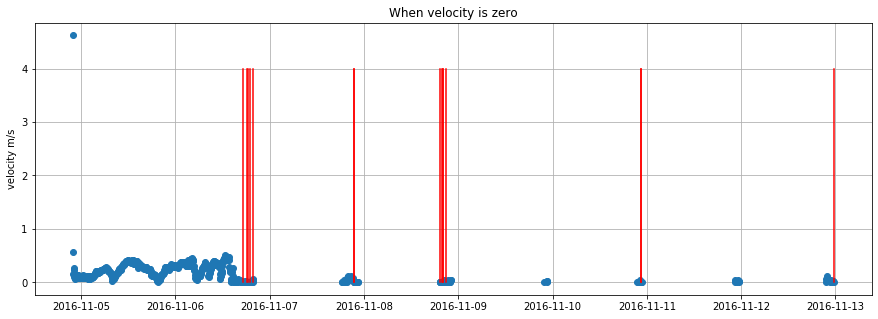

In [12]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(times[1:], velocity, 'o')
ax.grid()
inds = np.where(velocity ==0)
for i in inds:
    ax.plot([times[1:][i], times[1:][i]], [0,4,],'r')
ax.set_ylabel('velocity m/s')
ax.set_title('When velocity is zero')

Text(0.5, 1.0, 'When velocity is below 1 cm/s')

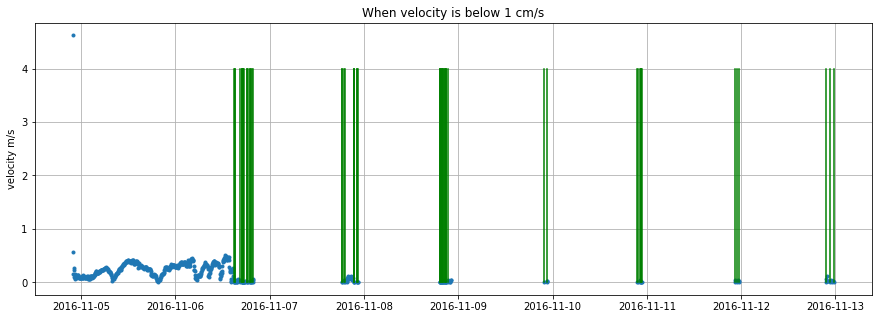

In [13]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(times[1:], velocity, '.')
ax.grid()
inds = np.where(velocity <0.01)
for i in inds:
    ax.plot([times[1:][i], times[1:][i]], [0,4,],'g')
ax.set_ylabel('velocity m/s')
ax.set_title('When velocity is below 1 cm/s')

Text(0, 0.5, 'count')

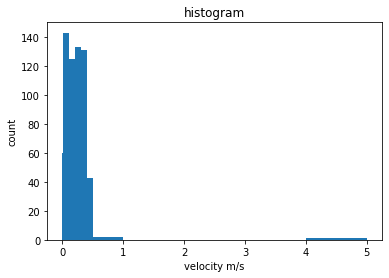

In [14]:
fig,ax=plt.subplots(1,1)
ax.hist(velocity,bins=[0,0.01,0.1,0.2,0.3,0.4,0.5,1,2,3,4,5])
ax.set_xlabel('velocity m/s')
ax.set_title('histogram')
ax.set_ylabel('count')

## Summary

* This drifter was likely grounded. Could remove from analysis but it likely won't have a huge impact on overall statistics (only 23 releases our of over 2000). May have a small impact on the maps.
* Going foward, we should exclude unrealistically small velocities in our qc (if we don't already). 

# wp3772515323D20160526

In [15]:
f = glob.glob(os.path.join(data_dir, '*wp3772515323D20160526*'))[0]
d = xr.open_dataset(f)

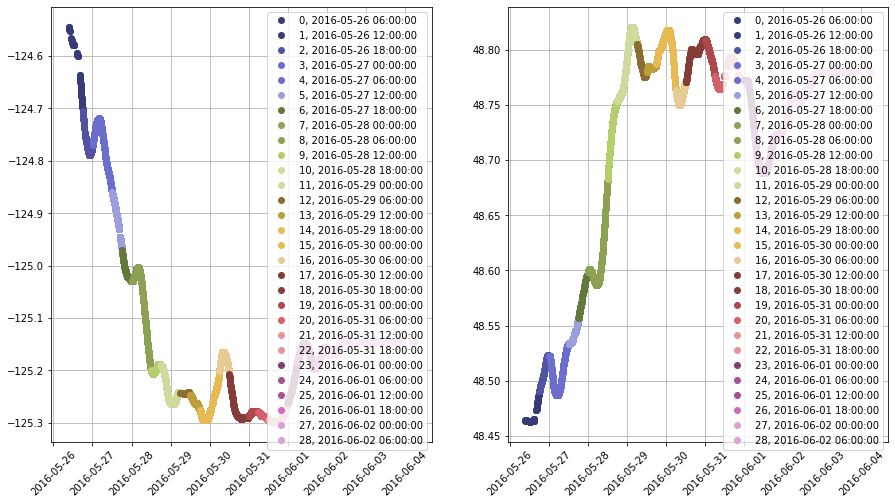

In [16]:
fig, axs = plt.subplots(1,2,figsize=(15,8))
n = d.obs_lon.values.shape[0]
color=cm.tab20b(np.linspace(0,1,n))
for i in range(n):
    ax=axs[0]
    ax.plot(d.time[i,:], d.obs_lon.values[i,:],'o',c=color[i],label='{}, {}'.format(i, d.mod_start_date[i].values))
    ax=axs[1]
    ax.plot(d.time[i,:], d.obs_lat.values[i,:],'o',c=color[i],label='{}, {}'.format(i, d.mod_start_date[i].values))
for ax in axs:
    ax.legend(loc=0)
    ax.grid()
    ax.tick_params(axis='x', labelrotation=45)

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


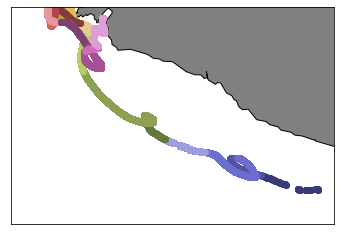

In [17]:
fig, ax = plt.subplots(1,1)
m = Basemap(projection='merc', llcrnrlon=-125.4, urcrnrlon=-124.5, llcrnrlat=48.4, urcrnrlat=48.8,
            resolution='h', ax=ax)
x,y=m(d.obs_lon.values,d.obs_lat.values)
for i in range(d.obs_lon.values.shape[0]):
    m.plot(x[i,:],y[i,:], 'o',c=color[i])
m.drawcoastlines()
m.fillcontinents(color='gray')

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


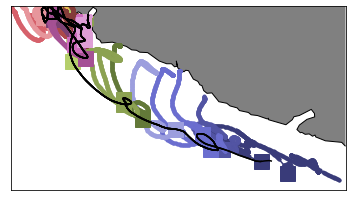

In [18]:
fig, ax = plt.subplots(1,1)
m = Basemap(projection='merc', llcrnrlon=-125.4, urcrnrlon=-124.3, llcrnrlat=48.4, urcrnrlat=48.8,
            resolution='h', ax=ax)
x,y=m(d.obs_lon.values,d.obs_lat.values)
xm,ym =m(d.mod_lon.values, d.mod_lat.values)
xs,ys=m(d.mod_start_lon.values, d.mod_start_lat.values)
for i in range(n):
    m.plot(xm[i,:], ym[i,:], '.-', c=color[i])
    m.plot(xm[i,0], ym[i,0], 'o', c=color[i],ms=10)
    m.plot(xs[i], ys[i], 's',c=color[i],ms=15)
    m.plot(x[i,:],y[i,:], '-', c='k',zorder=10)
m.drawcoastlines()
m.fillcontinents(color='gray')

It appears the model didn't start with the observed trajector. Let's dig in a bit more.

Open original observations

In [19]:
f= glob.glob(os.path.join(obs_dir, '*wp3772515323D20160526*'))[0]
do = xr.open_dataset(f)

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


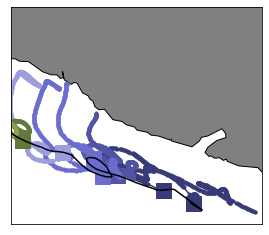

In [20]:
fig, ax = plt.subplots(1,1)
m = Basemap(projection='merc', llcrnrlon=-125, urcrnrlon=-124.3, llcrnrlat=48.4, urcrnrlat=48.8,
            resolution='h', ax=ax)
x,y=m(d.obs_lon.values,d.obs_lat.values)
xm,ym =m(d.mod_lon.values, d.mod_lat.values)
xs,ys=m(d.mod_start_lon.values, d.mod_start_lat.values)
for i in range(n):
    m.plot(xm[i,:], ym[i,:], '.-', c=color[i])
    m.plot(xm[i,0], ym[i,0], 'o', c=color[i],ms=10)
    m.plot(xs[i], ys[i], 's',c=color[i],ms=15)
xo,yo=m(do.LONGITUDE.values, do.LATITUDE.values)
m.plot(xo,yo,'k-')
m.drawcoastlines()
m.fillcontinents(color='gray')

Original observed file goes through this position so what is going on here?

In [21]:
print(do.TIME[0:10])
print(d.time)

<xarray.DataArray 'TIME' (TIME: 10)>
array(['2016-05-26T01:30:24.000000000', '2016-05-26T01:33:50.000000000',
       '2016-05-26T01:38:51.000000000', '2016-05-26T01:43:58.000000000',
       '2016-05-26T04:13:36.000000000', '2016-05-26T04:18:01.000000000',
       '2016-05-26T04:22:58.000000000', '2016-05-26T04:27:59.000000000',
       '2016-05-26T09:20:36.000000000', '2016-05-26T09:24:55.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * TIME     (TIME) datetime64[ns] 2016-05-26T01:30:24 ... 2016-05-26T09:24:55
<xarray.DataArray 'time' (model_run: 29, timestep: 576)>
array([['2016-05-26T09:20:36.000000000', '2016-05-26T09:24:55.000000000',
        '2016-05-26T09:29:54.000000000', ...,                           'NaT',
                                  'NaT',                           'NaT'],
       ['2016-05-26T12:04:49.000000000', '2016-05-26T12:09:47.000000000',
        '2016-05-26T12:14:49.000000000', ...,                           'NaT',
                                  'Na

The first model release was 20160526 06:00. The observed file has data at 20160526 04:27 and 09:20. So, it interpolated to release the model at 06:00 but then the next observed time was 3.5 hours away. The model diverged from the observed track making it look look far away at 09:20. To top it off, the observed points that helped determine the model release point were excluded because they don't fall in thesimulation time period.

## Summary
* There is nothing technically wrong here - it is just an artifact of how we are plotting and the fact that we have to interpolate in space/time to get a model release. 

# wp4362522943D20160617

In [22]:
f = glob.glob(os.path.join(data_dir, '*wp4362522943D20160617*'))[0]
d = xr.open_dataset(f)

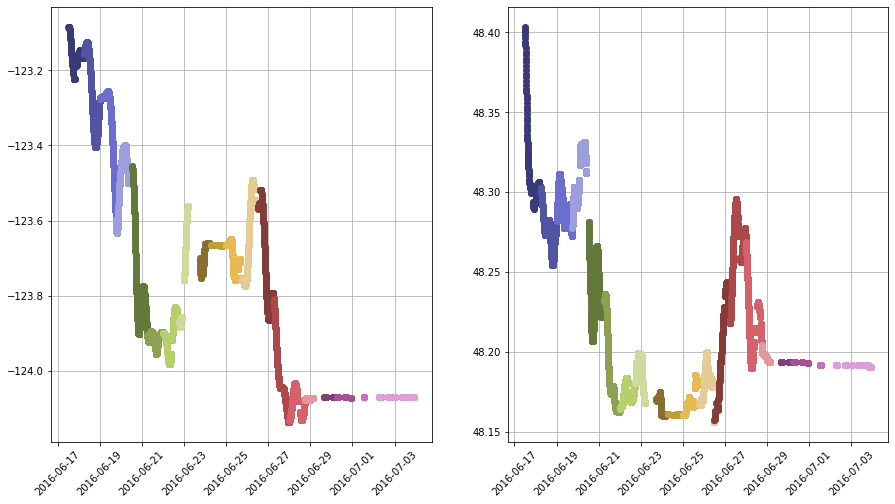

In [23]:
fig, axs = plt.subplots(1,2,figsize=(15,8))
n = d.obs_lon.values.shape[0]
color=cm.tab20b(np.linspace(0,1,n))
for i in range(d.obs_lon.values.shape[0]):
    ax=axs[0]
    ax.plot(d.time[i,:], d.obs_lon.values[i,:],'o',c=color[i],label='{}, {}'.format(i, d.mod_start_date[i].values))
    ax=axs[1]
    ax.plot(d.time[i,:], d.obs_lat.values[i,:],'o',c=color[i],label='{}, {}'.format(i, d.mod_start_date[i].values))
for ax in axs:
    #ax.legend(loc=0)
    ax.grid()
    ax.tick_params(axis='x', labelrotation=45)

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


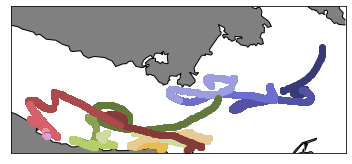

In [24]:
fig, ax = plt.subplots(1,1)
m = Basemap(projection='merc', llcrnrlon=-124.2, urcrnrlon=-123, llcrnrlat=48.15, urcrnrlat=48.5,
            resolution='h', ax=ax)
x,y=m(d.obs_lon.values,d.obs_lat.values)
for i in range(d.obs_lon.values.shape[0]):
    m.plot(x[i,:],y[i,:], 'o', c=color[i])
m.drawcoastlines()
m.fillcontinents(color='gray')

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


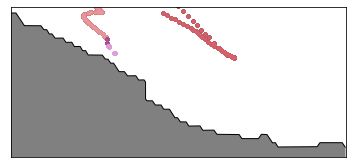

In [25]:
fig, ax = plt.subplots(1,1)
m = Basemap(projection='merc', llcrnrlon=-124.1, urcrnrlon=-124, llcrnrlat=48.17, urcrnrlat=48.2,
            resolution='f', ax=ax)
x,y=m(d.obs_lon.values,d.obs_lat.values)
for i in range(d.obs_lon.values.shape[0]):
    m.plot(x[i,:],y[i,:], '.',c=color[i])
m.drawcoastlines()
m.fillcontinents(color='gray')

This drifter appears to have grounded as well (ie stopped moving). The basemap landmask clearly doesn't represent where the ocean starts/ends. 


/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


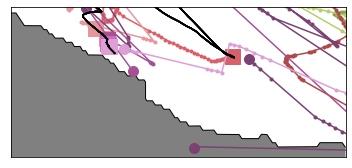

In [26]:
fig, ax = plt.subplots(1,1)
m = Basemap(projection='merc', llcrnrlon=-124.1, urcrnrlon=-124, llcrnrlat=48.17, urcrnrlat=48.2,
            resolution='f', ax=ax)
x,y=m(d.obs_lon.values,d.obs_lat.values)
xm,ym =m(d.mod_lon.values, d.mod_lat.values)
xs,ys=m(d.mod_start_lon.values, d.mod_start_lat.values)
for i in range(n):
    m.plot(xm[i,:], ym[i,:], '.-', c=color[i])
    m.plot(xm[i,0], ym[i,0], 'o', c=color[i],ms=10)
    m.plot(xs[i], ys[i], 's',c=color[i],ms=15)
    m.plot(x[i,:],y[i,:], '-', c='k',zorder=10)
m.drawcoastlines()
m.fillcontinents(color='gray')

Load original obs file to calculate velocities

In [27]:
f= glob.glob(os.path.join(obs_dir, '*wp4362522943D20160617*'))[0]
d = xr.open_dataset(f)

In [28]:
times=d.TIME.values
lons=d.LONGITUDE.values
lats=d.LATITUDE.values
velocity = drifter_velocities(times, lons, lats)
print(velocity.max(), velocity.min())

2.3445003985240054 0.0


Again, zero velocities 

Text(0.5, 1.0, 'When velocity is zero')

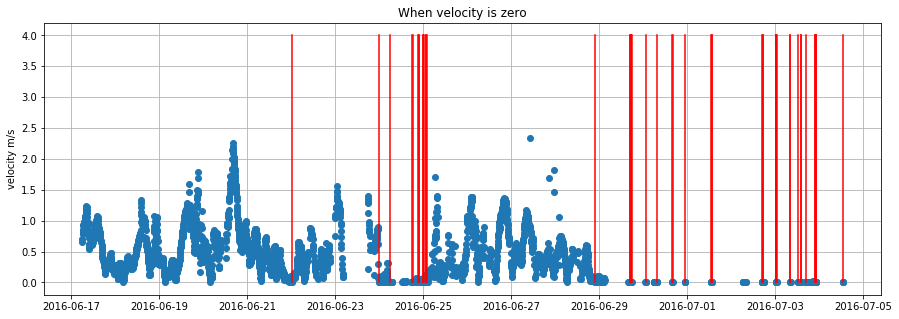

In [29]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(times[1:], velocity, 'o')
ax.grid()
inds = np.where(velocity ==0)
for i in inds:
    ax.plot([times[1:][i], times[1:][i]], [0,4,],'r')
ax.set_ylabel('velocity m/s')
ax.set_title('When velocity is zero')

Text(0.5, 1.0, 'When velocity is below 1 cm/s')

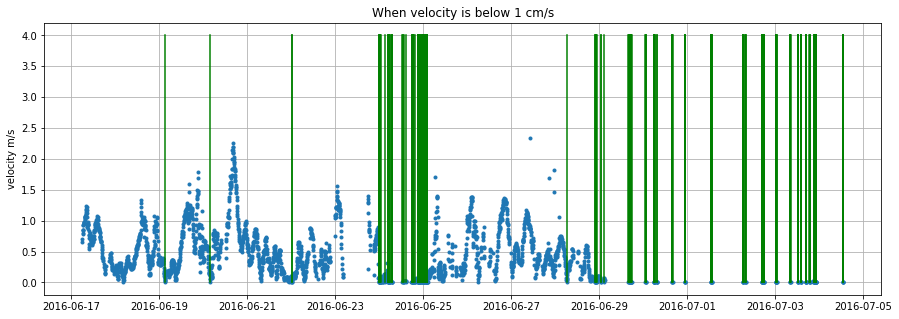

In [30]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(times[1:], velocity, '.')
ax.grid()
inds = np.where(velocity <0.01)
for i in inds:
    ax.plot([times[1:][i], times[1:][i]], [0,4,],'g')
ax.set_ylabel('velocity m/s')
ax.set_title('When velocity is below 1 cm/s')

Text(0, 0.5, 'count')

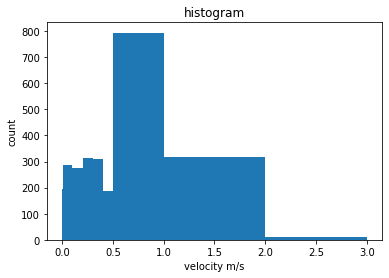

In [31]:
fig,ax=plt.subplots(1,1)
ax.hist(velocity,bins=[0,0.01,0.1,0.2,0.3,0.4,0.5,1,2,3])
ax.set_xlabel('velocity m/s')
ax.set_title('histogram')
ax.set_ylabel('count')

# Conclusions
* We should exclude drifter data whith unphyscially small velocities.
* Because we are interpolating to observed times which could have large data gaps, we need to be careful how we interpret maps of the trajectories. If a model/obs have straight lines it is likely because of a large gap between output times. If the model appreas to start far away from the observed trajectory, it could be because of a large gap overwhich we had to interpolate the model start position. 
* We could exclude data with a large time gap, but the definition of large will depend on the flow field. Faster currents would warrant a smaller gap.
* We could rexamine how we plot the maps by using the uninterpolated model data.
* The basemap land mask cannot be used to determine when a drifter is grounded.

## moving forward
* Consider exlcuding wp4362522943D20160617 and wp5752521552D20161104 from analysis
* wp3772515323D20160526 is fine.